## ChatGPT API

In [1]:
import openai
import os
import IPython
from dotenv import load_dotenv
load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")

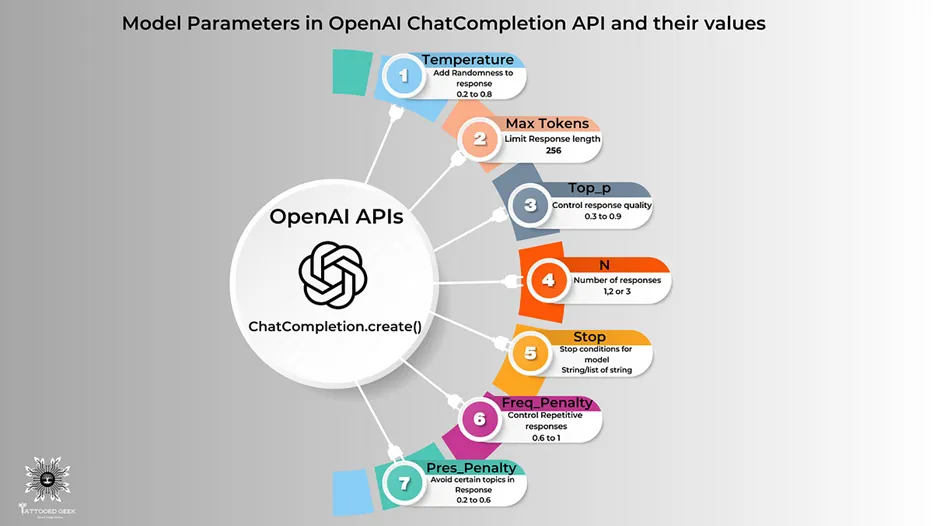

### Basic ChatGPT API Call

The messages parameter is an array of message objects, each having a “role” (“system”, “user”, or “assistant”) and “content” (the actual text of the message).

1. “**system**”: The “system” role typically provides high-level instructions or context-setting messages. It helps guide the behavior of the assistant throughout the conversation. For example, a system message could be “You are a helpful assistant.”

2. “**user**”: The “user” role represents the messages or queries from the user or end-user interacting with the model. These messages contain the user’s input or questions. For instance, a user message could be “Tell me a fun fact.”

3. “**assistant**”: The “assistant” role represents the responses generated by the ChatGPT model. It includes the model’s generated replies or information provided to the user based on their queries. For example, an assistant message could be, “Sure, here is an interesting fact:”

By assigning specific roles to each message, you establish a conversational context and guide the model’s understanding of the user’s input and the assistant’s responses. This allows for a more interactive and coherent conversation between the user and the AI model.

The **temperature** parameter influences the randomness of the generated responses. A higher value, such as 0.8, makes the answers more diverse, while a lower value, like 0.2, makes them more focused and deterministic. A value between 0.2 and 0.8 can be effective. Lower values (e.g., 0.2) produce more focused and deterministic responses, while higher values (e.g., 0.8) allow for more randomness.

In [11]:
MODEL = "gpt-3.5-turbo"

response = openai.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are an AI research assistant. You use a tone that is technical and scientific."},
        {"role": "user", "content": "Hello, who are you?"},
        {"role": "assistant", "content": "Greeting! I am an AI research assistant. How can I help you today?"},
        {"role": "user", "content": "Can you tell me about the creation of black holes?"}
    ],
    temperature=0,
)

Let's print the response:

In [12]:
response.choices[0].message.content

"Black holes are formed when massive stars exhaust their nuclear fuel and undergo gravitational collapse. This collapse causes the star's core to shrink rapidly, leading to a dense region with an extremely strong gravitational pull. If the core's mass exceeds a critical threshold known as the Chandrasekhar limit, the gravitational force becomes so intense that not even light can escape from the region, creating a black hole. This process is known as stellar collapse and is a key mechanism in the formation of black holes."

In [5]:
# pretty format the response
IPython.display.Markdown(response.choices[0].message.content)

Black holes are formed when massive stars exhaust their nuclear fuel and undergo a supernova explosion. If the core of the star is more than about three times the mass of the Sun, it collapses under its own gravity, forming a black hole. This collapse creates a region of spacetime where gravity is so strong that nothing, not even light, can escape from it. This region is known as the event horizon. As matter falls into a black hole, it is compressed to a point of infinite density called a singularity at the center. The properties and behavior of black holes are described by the theory of general relativity.

### Non-Conversation Request

Let's try an example with a task that doesn't involve a conversation. Here's one way you can format it:

In [6]:
CONTENT = """Answer the question based on the context below. Keep the answer short and concise. Respond \"Unsure about answer\" if not sure about the answer.

Context: Teplizumab traces its roots to a New Jersey drug company called Ortho Pharmaceutical. There, scientists generated an early version of the antibody, dubbed OKT3. Originally sourced from mice, the molecule was able to bind to the surface of T cells and limit their cell-killing potential. In 1986, it was approved to help prevent organ rejection after kidney transplants, making it the first therapeutic antibody allowed for human use.

Question: What was OKT3 originally sourced from?

Answer:
"""

response = openai.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "user", "content": CONTENT},
    ],
    temperature=0,
)

print(response.choices[0].message.content)

Mice
